In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("../input/insurance.csv")

In [3]:
print (df.head())
print (df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


In [4]:
df.shape

(1338, 7)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


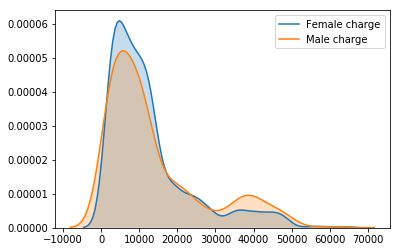

In [5]:
sns.kdeplot(df[df['sex']=='female']['charges'], shade=True, label = 'Female charge')
sns.kdeplot(df[df['sex']=='male']['charges'], shade=True, label = 'Male charge')


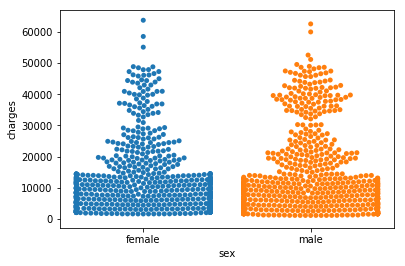

In [6]:
sns.swarmplot(x='sex', y='charges', data=df)

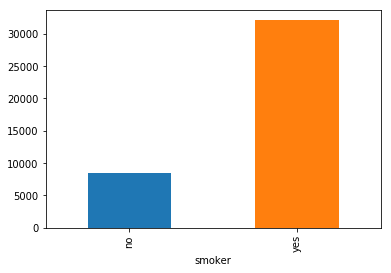

In [7]:
#The impact of smoke on charges

df.groupby("smoker")['charges'].agg('mean').plot.bar()

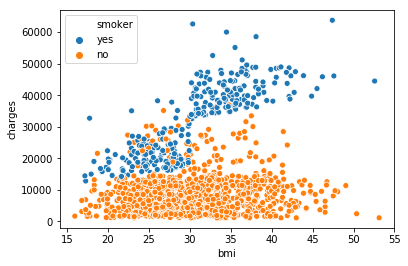

In [8]:
sns.scatterplot(x='bmi', y='charges',hue='smoker',data=df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


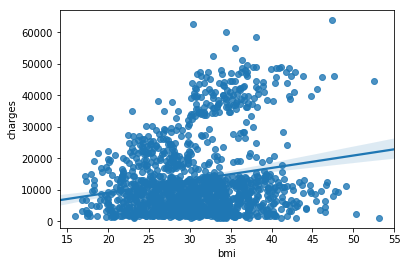

In [9]:
sns.regplot(x='bmi',y='charges',data=df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


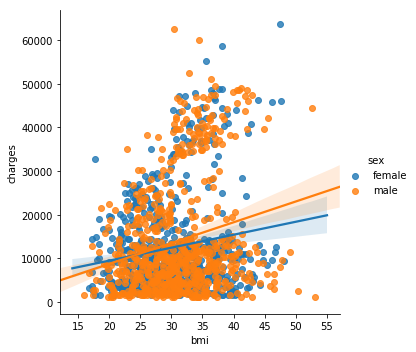

In [10]:
sns.lmplot(x='bmi',y='charges',hue='sex',data=df)

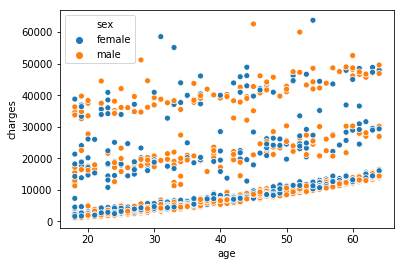

In [11]:
sns.scatterplot(x='age', y='charges', hue='sex',data=df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


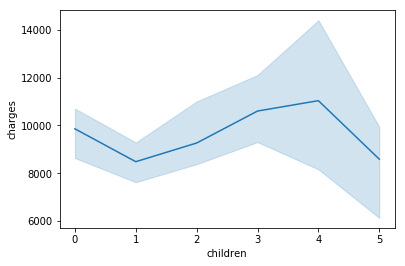

In [12]:
sns.lineplot(x='children', y='charges',  estimator=np.median, data=df);

In [13]:
#sns.lineplot(x='children', y='charges', data=df);
#sns.scatterplot(x='children', y='charges', data=df)
df.groupby('children')['charges'].agg('median')

children
0     9856.95190
1     8483.87015
2     9264.97915
3    10600.54830
4    11033.66170
5     8589.56505
Name: charges, dtype: float64

# Missing values

Good news: 0 missing data in this dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [15]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_dummies.drop('charges', axis= 1)
y = df_dummies.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, lm.predict(X_test))

4011.449679327984

# Baseline Model

To compare the models, we need to have a baseline model.

In our baseline model, the predicted values (^y) are the average of response values (y).

In [21]:
avg_charges = pd.Series([y_test.mean()]* y_test.shape[0])
avg_charges
mean_absolute_error(y_test, avg_charges)

9596.630168057249

# Ridge, Lasso and Elastic Net Regression

We are going to implement Ridge and Lasso regressions to test the improvement of these models. Especially we wish to see a huge improvement compared to our baseline model (Mean_absolute_error : 9596.63)

In [22]:
from sklearn.linear_model import Lasso,Ridge, ElasticNet

In [52]:
ridge = Ridge()
ridge.fit(X_train, y_train)
mean_absolute_error(y_test, ridge.predict(X_test))

4019.0988942944255

In [24]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
mean_absolute_error(y_test, lasso.predict(X_test))

4011.9874569365043

In [25]:
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)
mean_absolute_error(y_test, elasticnet.predict(X_test))

6396.855788226457

# Hyperparameter Tuning

The improvements can be observed from the Ridge and Lasso regressions. Next, we are going to take this to the next level by tuning the hyperparameter. **GridSearchCV** is the best function in sklearn library to test these tweaks.

In [26]:
from sklearn.model_selection import GridSearchCV

In [44]:
params = {'alpha': [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

params_elastic ={'alpha': [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                'l1_ratio': [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

In [49]:
# Ridge
ridge_cv = GridSearchCV(ridge, params, scoring = 'neg_mean_absolute_error')
ridge_cv.fit(X_train,y_train)

# Lasso
lasso_cv = GridSearchCV(lasso, params, scoring = 'neg_mean_absolute_error')
lasso_cv.fit(X_train,y_train)

# Elastic Net
elasticnet_cv = GridSearchCV(elasticnet, params_elastic, scoring = 'neg_mean_absolute_error')
elasticnet_cv.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [51]:
print (ridge_cv.best_params_)
print (lasso_cv.best_params_)
print (elasticnet_cv.best_params_)
print (mean_absolute_error(y_test, ridge_cv.predict(X_test)))
print (mean_absolute_error(y_test, lasso_cv.predict(X_test)))
print (mean_absolute_error(y_test, elasticnet_cv.predict(X_test)))

{'alpha': 0.1}
{'alpha': 0.1}
{'alpha': 0.1, 'l1_ratio': 1}
4012.2078807454254
4011.5030809771497
4011.5030809771497


## Conclusion

**Lasso regression** is a superior model as it gives the lowest mean absolute error.

# Future Consideration

1. Feature Selection
2. Feature Extraction
3. Cross validation
4. Other Models: DecisionTreeRegressor, RandomForestRegressor and many more ensemble models